# **Data Preprocessing**

In [85]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [109]:
# Extract the ith column from a dataset
def extract_column(dataset, i):
    df = pd.read_csv(dataset)
    column = df.iloc[:, [i]]
    scaler = MinMaxScaler(feature_range=(0, 1))
    column = scaler.fit_transform(column).flatten()     # Normalise the column values into (0,1) range
    return df, column

In [87]:
# Split the sequential data into train and test sets
def get_train_test(data, split_percent):
    n = len(data)
    split = int(n * split_percent)
    train = data[:split]
    test = data[split:]
    return train, test

In [88]:
# Reshape the sequential data into a target variable set and feature sets
def get_XY(data, time_steps):
    y_indexes = np.arange(time_steps, len(data), time_steps)
    y = data[y_indexes]
    X_rows = len(y)
    X = data[range(X_rows*time_steps)]
    X = np.reshape(X, (X_rows, time_steps, 1))
    return X, y

# **Build, Train & Test your RNN**


In [89]:
import tensorflow as tf

In [122]:
# Load the sequential data
df, ts = extract_column('Tasla_Stock_Updated_V2.csv', 3)

# Split the data into train and test sets (80/20 split)
train, test = get_train_test(ts, 0.8)

# Reshape the train and test sets into features (X) and target (y)
X_train, y_train, = get_XY(train, 12)
X_test, y_test = get_XY(test, 12)

# Build the model
RNN_model = tf.keras.Sequential([
    tf.keras.Input(shape=(12, 1)),
    tf.keras.layers.SimpleRNN(16, activation='tanh'),
    tf.keras.layers.Dense(1, 'tanh')
])

# Compile the model
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
train_history = RNN_model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test set
loss = RNN_model.evaluate(X_test, y_test)

# Print loss
print(f'Test Loss: {loss:.4f}')

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0247
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0091
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0043
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0019
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013    
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0011    
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0010    
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0011
Epoch 1

#**Plot Metrics**

In [125]:
import matplotlib.pyplot as plt

In [126]:
# Print a parameters table
RNN_model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_41 (SimpleRNN)       │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917 (3.59 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 612 (2.39 KB)

In [127]:
# Plot a prediction & true value against time graph
def plot_lo(predictions, true_values):
  plt.plot(predictions, label='predicted value')
  plt.plot(true_values, label='true value')
  plt.xlabel('Observation')
  plt.ylabel('Stock Price')
  plt.legend(['predicted value', 'true value'])
  plt.grid(True)
  plt.show

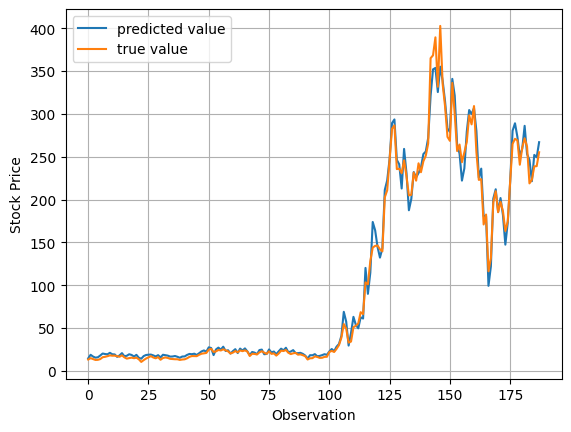

In [128]:
# Restore the whole dataset
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

# Make predictions on the dataset
y_pred = RNN_model.predict(X, verbose = 0)

# Find the highest and lowest values in the dataset
max = np.max(df.iloc[:, [3]])
min = np.min(df.iloc[:, [3]])

# Unscale the predictions and the real values
predictions = y_pred * (max - min) + min
actual = y * (max - min) + min

# Plot the prediction & true value against time graph
plot_lo(predictions, actual)

#**Apply the Model**

In [130]:
# Load dataset for predictions
df_pred, ts_pred = extract_column('Tasla_Stock_Updated_V2.csv', 3)
X_pred, _ = get_XY(ts_pred, 12)

# Make predictions on the dataset
y_pred = RNN_model.predict(X_pred, verbose=0)

# Unscale the predictions
max = np.max(df_pred.iloc[:, [3]])
min = np.min(df_pred.iloc[:, [3]])
y_pred = y_pred * (max - min) + min

# Get the stock price dates
dates = df_pred['Date']

# Combine the stock price dates and the predictions
predictions = zip(dates, y_pred)

# Print predictions
print('Predictions:')
for date, pred in predictions:
  print(f'{pred[0]} will be the highest Tesla stock price on {date}.')

Predictions:
14.630593299865723 will be the highest Tesla stock price on 2015-01-02.
18.78969955444336 will be the highest Tesla stock price on 2015-01-05.
16.758981704711914 will be the highest Tesla stock price on 2015-01-06.
15.46549129486084 will be the highest Tesla stock price on 2015-01-07.
15.884561538696289 will be the highest Tesla stock price on 2015-01-08.
17.97598648071289 will be the highest Tesla stock price on 2015-01-09.
20.284210205078125 will be the highest Tesla stock price on 2015-01-12.
19.668804168701172 will be the highest Tesla stock price on 2015-01-13.
19.398170471191406 will be the highest Tesla stock price on 2015-01-14.
21.092178344726562 will be the highest Tesla stock price on 2015-01-15.
19.37242317199707 will be the highest Tesla stock price on 2015-01-16.
19.228954315185547 will be the highest Tesla stock price on 2015-01-20.
16.39504623413086 will be the highest Tesla stock price on 2015-01-21.
18.064647674560547 will be the highest Tesla stock price